In [ ]:
"""
<시계열 분석>
 - 시간(time)의 흐름(step)에 따른 데이터들이 가지고 있는 특징(패턴)을 찾는 분석
 - 독립변수(X)는 시간이 되며, 종속변수(y)는 데이터가 됩니다.
 - 회귀모델과 유사한 시각화(선형)를 통해 확인합니다.
 - 시간의 흐름에 따른 향수 데이터를 확인하기 위한 예측 방법입니다.
 - 사용되는 분석 방법은 다양하며, 이중 ARIMA 모델이 가장 많이 사용됨
"""

### 사용할 라이브러리

In [1]:
### 날짜 관련
import datetime

### 시각화
import matplotlib.pyplot as plt

### 한글처리
plt.rc("font", family = "Malgun Gothic")

### 마이너스기호 처리
plt.rcParams["axes.unicode_minus"] = False

### 데이터 수집

In [ ]:
"""
<사용할 데이터셋>
 - 증권사: yahoo finance(야후 증권, 이외 다양한 증권사에서 제공하는 데이터로 사용 가능)
 - 수집 기간: 2012년 10월 31일 ~ 2022년 10월 31일까지 (10년간 데이터 수집)
 - 수집 증권: 구글 주식 수집
 - 수집 증권 종목명: GOOG
 - 데이터 제공 증권사에서 제공하는 데이터셋 라이브러리: yfinance
  -> 설치 필요: pip install yfinance 
"""

In [2]:
### 야후 증권 데이터셋 제공 라이브러리
import yfinance as yf

In [3]:
### 10년치 데이터 수집을 위한 기간 설정하기
# - 날짜 타입의 년월일시분초 타입의 데이터로 기간을 생성해야함
start = datetime.datetime(2012, 10, 31, 0, 0, 0)
end = datetime.datetime(2022, 10, 31, 0, 0, 0)

start, end

(datetime.datetime(2012, 10, 31, 0, 0), datetime.datetime(2022, 10, 31, 0, 0))

In [4]:
### 데이터 수집하기
# - start: 시작기간
# - end: 종료기간
# - auto_adjust=False: 조정하지 않은 실거래가(실제 거래 가격) 제공
goog_data = yf.download("GOOG", start=start, end=end, auto_adjust=False)
print(len(goog_data))
goog_data

[*********************100%***********************]  1 of 1 completed

2517


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2012-10-31,16.843868,16.943991,16.961424,16.811985,16.933031,61710442
2012-11-01,17.024363,17.125559,17.208000,16.904636,16.924065,82311371
2012-11-02,17.032532,17.133778,17.323816,17.120081,17.304888,93324497
2012-11-05,16.909725,17.010241,17.107376,16.825932,17.048597,65681270
2012-11-06,16.879026,16.979357,17.098412,16.875496,17.073006,63549309
...,...,...,...,...,...,...
2022-10-24,102.361549,102.970001,103.099998,100.300003,102.089996,24680800
2022-10-25,104.309967,104.930000,105.099998,103.019997,103.300003,29910200


In [5]:
### 데이터 정보 확인
goog_data.info()

"""
- Open     : 시작가
- High     : 상한가
- Low      : 하한가
- Close    : 종가
- Adj Close: 수정종가(분할, 배당, 배분, 신주 등이 발행한 경우 조정이 이루어진 값)
- Volumn   : 거래량
"""

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-10-31 to 2022-10-28
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  2517 non-null   float64
 1   (Close, GOOG)      2517 non-null   float64
 2   (High, GOOG)       2517 non-null   float64
 3   (Low, GOOG)        2517 non-null   float64
 4   (Open, GOOG)       2517 non-null   float64
 5   (Volume, GOOG)     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


'\n- Open     : 시작가\n- High     : 상한가\n- Low      : 하한가\n- Close    : 종가\n- Adj Close: 수정종가(분할, 배당, 배분, 신주 등이 발행한 경우 조정이 이루어진 값)\n- Volumn   : 거래량\n'

### 컬럼명 변경하기

In [6]:
### 컬럼명 확인하기
# - 컬럼명만 추출하기
goog_data.columns

"""
<MultiIndex>
 - 복합 컬럼명을 멀티인덱스라고 칭합니다.
 - 하나의 컬럼명이 두개 이상..
 - 우리는 앞쪽 컬럼명만 사용할 예정..
"""

'\n<MultiIndex>\n - 복합 컬럼명을 멀티인덱스라고 칭합니다.\n - 하나의 컬럼명이 두개 이상..\n - 우리는 앞쪽 컬럼명만 사용할 예정..\n'

In [7]:
### 컬럼명 변경하기
# - columns 속성 중에 get_level_values() 함수를 이용하여
#  -> 멀티인덱스의 0번째 값만 추출 가능
goog_data.columns = goog_data.columns.get_level_values(0)
# goog_data.columns = goog_data.columns.get_level_values(level=0)
goog_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-10-31,16.843868,16.943991,16.961424,16.811985,16.933031,61710442
2012-11-01,17.024363,17.125559,17.208000,16.904636,16.924065,82311371
2012-11-02,17.032532,17.133778,17.323816,17.120081,17.304888,93324497
2012-11-05,16.909725,17.010241,17.107376,16.825932,17.048597,65681270
2012-11-06,16.879026,16.979357,17.098412,16.875496,17.073006,63549309


### 시계열 분석에 사용할 데이터 추출하기

In [8]:
### [Adj Close(수정 종가)]데이터 별도로 추출하기
data = goog_data['Adj Close']
data

Date
2012-10-31     16.843868
2012-11-01     17.024363
2012-11-02     17.032532
2012-11-05     16.909725
2012-11-06     16.879026
                 ...    
2022-10-24    102.361549
2022-10-25    104.309967
2022-10-26     94.259705
2022-10-27     92.052826
2022-10-28     96.009308
Name: Adj Close, Length: 2517, dtype: float64

### 주식의 흐름(롤링-rolling)확인하기

In [ ]:
"""
<주식 흐름>
 - 주식 데이터는 흐름 또는 이동 변화로 확인됨
 - 주식의 흐름을 롤링(rolling)이라고 칭합니다.
 - 주식 흐름을 확인하기 위해서는 
  -> *이동평균(rolling mean)*과 *이동표준편차(rolling std)* 데이터가 필요합니다
 - 이동평균(rolling mean): 주식 가격의 흐름을 유연하게 보기 위하여 사용됨
 - 이동표준편차(rolling std): 변동성의 흐름을 보기 위하여 사용됨
"""

In [9]:
### 50일치에 대한 주식 흐름(이동 흐름) 확인하기
# - 전체년도 각각에 대한 50일치에 대한 이동평균과 이동표준편차 확인하기

### 50일 기간 설정
interval = 50

### 이동평균 계산
rolmean = data.rolling(interval).mean()

### 이동표준편차(rolling std) 계산
rolstd = data.rolling(interval).std()

rolmean, rolstd

(Date
 2012-10-31           NaN
 2012-11-01           NaN
 2012-11-02           NaN
 2012-11-05           NaN
 2012-11-06           NaN
                  ...    
 2022-10-24    105.354557
 2022-10-25    104.997679
 2022-10-26    104.447151
 2022-10-27    103.896027
 2022-10-28    103.413297
 Name: Adj Close, Length: 2517, dtype: float64,
 Date
 2012-10-31         NaN
 2012-11-01         NaN
 2012-11-02         NaN
 2012-11-05         NaN
 2012-11-06         NaN
                 ...   
 2022-10-24    7.394392
 2022-10-25    6.986401
 2022-10-26    6.715774
 2022-10-27    6.575355
 2022-10-28    6.235222
 Name: Adj Close, Length: 2517, dtype: float64)

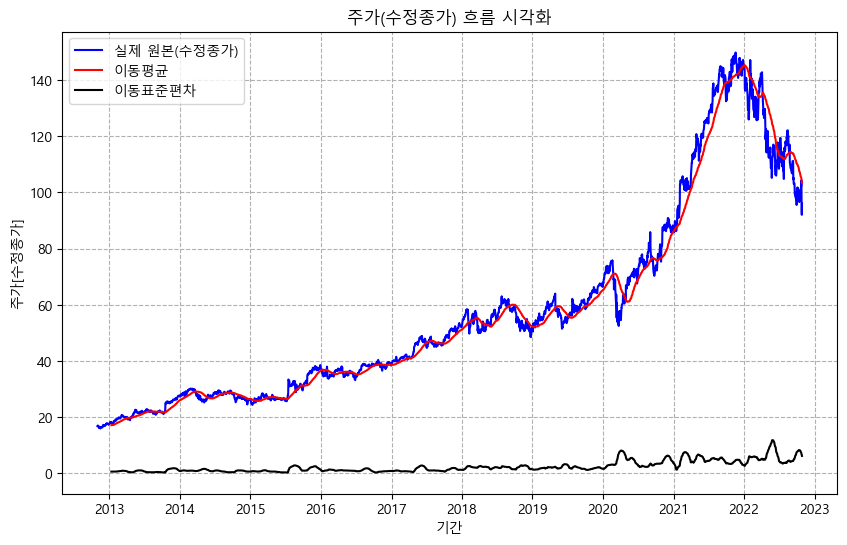

In [10]:
### 그래프로 시각화 하기
plt.figure(figsize=(10, 6))
plt.title('주가(수정종가) 흐름 시각화')

### 실제 주식 가격
plt.plot(data, c='blue', label='실제 원본(수정종가)')

### 이동 평균 그리기
plt.plot(rolmean, c='red', label='이동평균')

### 이동 표준 편차 그리기
plt.plot(rolstd, c='black', label='이동표준편차')

plt.xlabel('기간')
plt.ylabel('주가[수정종가]')

plt.legend()
plt.grid(linestyle='--')
plt.show()

### 데이터 스케일링 전처리

In [ ]:
"""
<시계열 분석을 위한 데이터 전처리>
 - 평균이 일정하지 않고 오르락, 내리락하는 불규칙 형태를 '비정상성' 이라고 칭함
 - 불규칙한 비정상성 데이터를 불규칙 하지 않도록 처리하는 방법. 즉 데이터 스케일링 처리해야함
 - 불규칙하지 않은 형태를 '정상성' 이라고 칭합니다.
 - 비정상성을 정상성으로 만들기 위해서는 '차수(d)'라는 개념이 적용됨(이후 설명 예정)
 - 정상성을 데이터 스케일링이라고 생각하시면 됩니다.
"""

### 시계열 데이터 분석 모델 -> ARIMA 모델 사용

In [ ]:
"""
<시계열 분석 ARIMA 모델>
 - 오랜 동안 사용되어온 통계학적 모델
 - 시계열 분석에서 주로 사용되는 모델
 - "시계열분석"은 일반적으로 [시간을 독립변수(X)]로 사용함
    --> 이외 데이터들을 [종속변수[y]]로 사용하여 예측하는 분석 방법
 
 - ARIMA(Autoregressive Integrated Moving Average)
  * 현 시점의 데이터를 이용해서
    --> 앞으로 어떤 패턴의 시각화로 그려질지를 예측하는 분석기법
  * AR(Autoregressive) : "자기상관" 이라고 칭합니다.
    - 이전의 값이 이후의 값에 어떠한 영향을 미치고 있는지에 대한 "관계성"을 나타냄
  * MA(Moving Average) : "이동평균" 이라고 칭합니다.
    - 특정 변수의 평균값이 지속적으로 증가하거나 감소하는 추이를 나타냄
  * AR(자기상관)과 MA(이동평균)을 통합(Integrated)한 모델을 ARIMA 모델이라고 칭합니다.


<분석 방법>
 - 시계열 분석 시에는 비정상성을 정상성(데이터스케일링)으로 만들어서 분석을 진행
   (기존의 데이터 스케일링 처리와 동일한 개념으로 사용됩니다.)
 - 정상성을 만들기 위해서 차수(d)라는 개념이 적용됩니다.
 
<정상성(stationary)과 비정상성(Non-stationary)>
 * 정상성
  - 평균과 분산(오르락 내리락)이 일정한 형태
  - 평균이 일정하고, 분산(오르락 내리락)하는 불규칙 형태가 없는 형태를 의미함
 
 * 비정상성
  - 평균과 분산이 일정하지 않은 형태(선의 형태가 급격히 오르락 내리락하는 형태)
  - 시간에 따라 평균 수준이 다르거나,
    특정한 패턴(Trend)이나 계절성(Sessonality)에 영향을 받는 경우 비정상 형태가 나타남
  - 예시 : 겨울에 난방비 증가, 여름에 아이스크림 판매량 증가


 * 비정상성을 정상성으로 만드는 이유
  - 예측범위를 일정하게 줄이고, 성능 개선을 위해서
  - 기존의 데이터스케일링(정규화-표준화) 개념이 적용됨
 
 * 비정상성을 정상성으로 변환하는 방법들
  - 평균의 정상화를 위한 "차분" 사용(주로 사용되는 방식)
  - 분산의 안정화를 위한 로그 변환 사용
  - 제곱/제곱근 변환 사용
  - 이외 등등 방법들
 
 * 차분이란
  - 비정상성을 정상성으로 만들기 위한 방법으로
  - 관측데이터들의 차이를 계산하여 사용하게됨
"""

In [ ]:
"""
<ADF 테스트(Augmented Dickey-Fuller Test)>
 - 시계열 데이터의 정상성 여부를 통계적인 정량 방법으로 검증하는 방법
 - 귀무가설과 대립가설에 따라 결정됨
  * 귀무가설 : 기존의 연구이론
  * 대립가설 : 신규 연구이론(귀무가설에 반하는 연구)->정상성이 있는 경우 진행
 - 귀무가설과 대립가설의 보편적 기준 : p-value < 0.05 (유의미성 여부에 따라 결정됨)
  * p-value < 0.05가 참이면 : 귀무가설 기각, 대립가설 채택 (유의미함, 정상성)
  * p-value < 0.05가 거짓이면 : 귀무가설 채택, 대립가설 기각 (유의미하지 않음, 비정상성)
 - ADF 테스트는 정상성과 비정상성 데이터 형태를 구분하는 용도로 사용됨
   (비정상성인 경우 -> 정상성으로 만들기 위한 처리를 수행 후 시계열분석을 진행하게됨)
 - ADF 테스트 라이브러리
  * 패키지 : statsmodels
  * 라이브러리 : adfuller
  * 설치 필요 : pip install statsmodels
"""

In [11]:
### ADF 라이브러리 정의
from statsmodels.tsa.stattools import adfuller

In [12]:
### 수정종가 데이터 확인하기
data.values

array([16.84386826, 17.02436256, 17.03253174, ..., 94.25970459,
       92.05282593, 96.00930786])

In [13]:
### ADF 테스트에 사용할 데이터: 수정종가 데이터, 인덱스 Date 날짜
# - 데이터만 추출하여 사용: 1차원 데이터(수정종가)
# - 수정종가 데이터를 이용하여 ADF 테스트 하기
# - 수정종가 데이터가 정상성인지 판단하기 위해서
result = adfuller(data.values)
result

(-0.7728514501759524,
 0.8269669792210315,
 24,
 2492,
 {'1%': -3.432976825339513,
  '5%': -2.862700515844509,
  '10%': -2.5673877878037974},
 8093.878312990888)

In [ ]:
"""
<출력 결과 값의 의미>
 * 첫번째 값(-0.772) : 테스트 통계량(Test Statistic)을 의미함
  - 데이터가 정상적인지를 테스트하기 위해 계산된 값을 의미함
  - 테스트 통계량이 작은 "음수 일수록 귀무 가설을 기각할 가능성이 높아짐"
 
 * 두번째 값(0.827) : p-value를 의미함
  - 기존의 가설(귀무가설)을 기각할 수 있는지의 여부를 나타내는 지표
  - p-value < 0.05 보다 작으면 귀무가설 기각(유의미함)
    -> ***이 경우 정상성이라고 결론 내릴 수 있음***
  - 0.827의 결과는 유의미 하지 않기 때문에 수정종가 데이터는 비정상성일 가능성이 높음
 
 * 세번째 값(24) : 사용된 지연 수(Number of Lags Used)를 의미함
  - ADF 테스트를 수행할 때 사용된 지연 차수(lags)의 값
  - 지연 차수 : 과거의 몇 시점까지의 데이터를,
               현재 시점의 데이터와 비교하여 테스트 할지 결정
  - ADF 테스의 결과 24개의 지연된 데이터 포인트를 사용하여 수행했다는 의미임
    즉, 과거의 24개 시점까지의 데이터를 현재 시점의 데이터와 비교 했다는 의미임
 
 * 네번째 값(2492) : 관측값의 수(Number of Observations Used)를 의미함
  - ADF 테스트 시에 총 2492개의 데이터 포인트가 사용되었다는 의미
 
 * 다섯번째 값(딕셔너리) : 임계값(critical values)을 의미함
  - 1%, 5%, 10% 각각의 값들을 유의수준에서의 임계값 이라고 칭합니다.
  - 첫번째 값(테스트 통계량)과 임계값 각각과 비교해서,
    임계값보다 테스트 통계량 값이 작으면 "정상성" 데이터, 크면 "비정성상" 이라고 판단
  - 첫번째 테스트 통계량의 값이 임계값모두 크기 때문에 "비정상성" 이라고 판담함
 
 * 여섯번째 값(8117) : 최대화된 정보기준(Akaike Information Criterion, AIC) 의미함
  - 모델의 적합도를 평가하는 데 사용함
  - AIC 값이 작을 수록 -> 더 적합한 모델로 간주
     -> 이 값을 이용해서 모델 선택에 사용됨(ARIMA 모델)
     
(결론)
 - p-value < 0.05를 만족하지 않기 때문에 수정종가 데이터는 "비정상성" 데이터임
   즉, 시간의 흐름에 따라 평균이나 분산이 변하는 데이터임
"""

In [ ]:
### ADF 테스트 결과에서 p-value 값 추출하여 정상성(유의미성) 여부 확인하기
print(f"p-value < 0.05: {result[1]:.3f} < 0.05")

### p-value < 0.05를 만족하지 않으므로 비정상성 데이터임
# - 비정상성 데이터인 경우 -> 정상으로 만들기 위한 데이터 스케일링 처리를 수행해야함

p-value < 0.05: 0.827 < 0.05


### 정상성 처리를 위한 데이터 스케일링 처리하기(차분 계산 방법 적용)

In [16]:
"""
<차분 계산>
 - 1차분을 '1d'라고 표현함
 - 사용함수: diff()
 - 차분을 계산하면, 최초 또는 차분의 이동거리에 따라서 NaN이 발생함
  -> NaN은 제거 후 사용됨
"""

# 1차분 계산
dff1 = data.diff()
dff1

Date
2012-10-31          NaN
2012-11-01     0.180494
2012-11-02     0.008169
2012-11-05    -0.122807
2012-11-06    -0.030699
                ...    
2022-10-24     1.481201
2022-10-25     1.948418
2022-10-26   -10.050262
2022-10-27    -2.206879
2022-10-28     3.956482
Name: Adj Close, Length: 2517, dtype: float64

In [17]:
### NaN 데이터 모두 제거하기
dff1 = data.diff().dropna()
dff1

Date
2012-11-01     0.180494
2012-11-02     0.008169
2012-11-05    -0.122807
2012-11-06    -0.030699
2012-11-07    -0.361488
                ...    
2022-10-24     1.481201
2022-10-25     1.948418
2022-10-26   -10.050262
2022-10-27    -2.206879
2022-10-28     3.956482
Name: Adj Close, Length: 2516, dtype: float64

<Axes: xlabel='Date'>

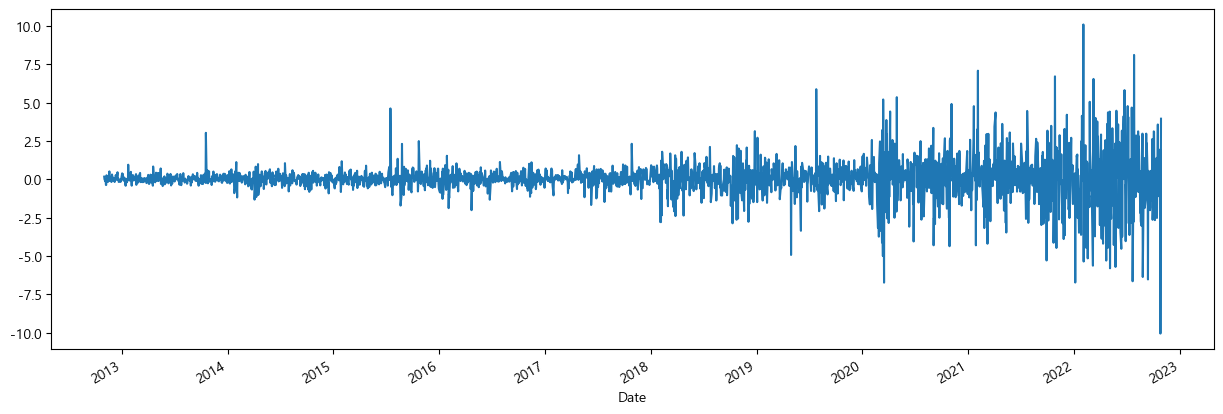

In [18]:
### 1차분 결과 데이터를 시각화 하기
dff1.plot(figsize=(15, 5))

In [ ]:
### 1차분 계산 결과 데이터를 이용하여 -> 다시 한번 ADF 테스트를 통해 정상성 여부 확인하기
result = adfuller(dff1.values)
print(result)

print(f"p-value < 0.05: {result[1]:.3f} < 0.05")

### 1차분 수행 후 수정종가 데이터는 p-value < 0.05를 만족하는 정상성 데이터로 
# - 시계열 분석에 사용 가능한 데이터임


(-10.592714980248974, 6.465826622493194e-19, 23, 2492, {'1%': -3.432976825339513, '5%': -2.862700515844509, '10%': -2.5673877878037974}, 8090.227676687931)
p-value < 0.05: 0.000 < 0.05


### ARIMA 모델 훈련을 위한 하이퍼파라미터 찾기

In [ ]:
"""
<ARIMA 모델 수행 방법>
 1. 하이퍼파라메터 찾기
   * ARIMA 모델에서 사용되는 중요한 3개의 하이퍼파라메터
    - p(자기회귀모형, AR), d(차분), q(이동평균모형, MA)값을 결정해야 함
    - p값은 찾아야 합니다.
    - q값은, p-q의 값이 0일 때의 q값을 찾으면 됩니다.
      즉, p값을 알면, q값이 됩니다.
     
   * p, d, q값을 결정하는 방법
    - ACF(자기상관) plot과 PACF(부분자기상관) plot을 통해
      모수(하이퍼파라메터)를 결정 할 수 있음
      --> 현재값이 과거값과 어떤 관계가 있는지를 보여주는 그래프로 확인 합니다.
   
    - pmdarima 라이브러리의 ndiffs, auto_arima 함수를 사용하여
      모수(하이퍼파라메터)를 결정할 수 있음
      --> 대표적으로 auto_arima 함수를 사용합니다.
          (GridSearchCV와 유사함, 자동으로 최적의 모델을 만들어냄)
   
 2. 찾은 하이퍼파라메터를 이용해서 모델 훈련
 3. 시계열 예측
 4. 시각화
"""

### (방법1) ACF 및 PACF plot을 통한 하이퍼파라미터 결정

In [22]:
### 사용 라이브러리
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

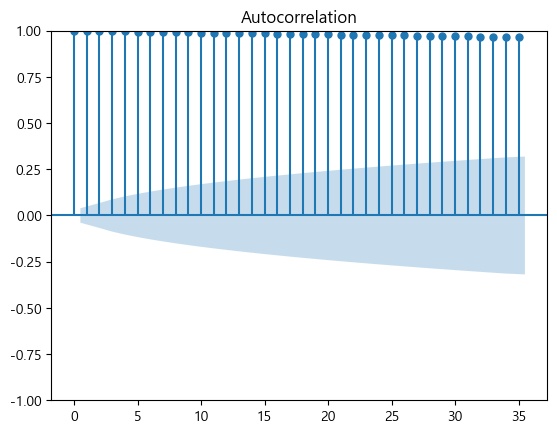

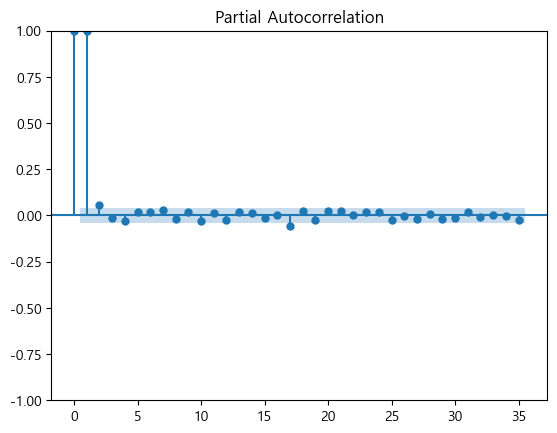

In [ ]:
### 수정종가 원본을 이용하여 ACF 및 PACF 시각화하기
plot_acf(data)
plot_pacf(data)
plt.show()

"""(해석 방법)
 - x축을 lag라고 칭합니다.
 - y축은 지표값이라고 칭합니다.
 - 파랑색 영역은 "신뢰구간" 이라고 칭합니다.
   (95% 신뢰 구간을 의미함)


* ACF(자기상관) plot
 - ACF는 시계열 데이터가 얼마나 자기상관(자기 자신과 다른 데이터가 얼마나 연관이 있는지)를
   보여주는 시각화
 - ACF plot에서 막대그프가 "천천히 감소"되는 것으로 보임
 - 이는 주식 데이터가 주기에 따라서 일정하지 않음을 의미함(비정상성)으로 판단함
 - 시계열 데이터에서 과거 값과 현재 값 사이의 상관관계를 측정
 - ACF는 MA(q) 모델의 적절한 q값을 선택할 때 사용됩니다.
 - ACF 그래프에서 유의미한 지점까지의 lag 수가 q가 됨
 - (해석 예시)첫 1~2개의 막대가 파란 영역을 벗어나면 → MA(q)에서 q=1 또는 q=2 후보가 됨


* PACF(부분자기상관) plot
 - PACF는 중간에 있는 다른 시점들의 영향을 제거한 후에 계산된 상관 관계를 나타냄
 - 첫값을 제외한 2번째 막대그래프가 파랑색 영역에 들어가지 않고,
   끊기는 것으로 보임
 - 세번째 값부터 파랑색 영역에 포함되어 있음
 - 첫번째 막대그래프를 제외하고 2번째 막대그래프에 대한 1차분 처리가 필요함
 - 현재 시점과 특정 시점(lag) 사이의 순수한 상관관계를 측정 (중간 값들의 영향 제거)
 - PACF는 AR(p) 모델의 적절한 p값을 선택할 때 사용됩니다.
 - PACF 그래프에서 유의미한 지점까지의 lag 수가 p가 됨
 - (해석 예시)첫 번째 1~2개의 막대가 파란 영역을 벗어나면 → AR(p)에서 p=1 또는 p=2 후보가 됨


* ACF 및 PACF 공통사항
 - x축 0번째의 값은 항상 1입니다.
 - 즉, 0번째의 값은 -> 자기 자신과의 상관관계를 나타내는 값으로 -> 항상 1 입니다.
 - 따라서, 실제로 지표 확인 시에는 0번짹 값은 제외하고 해석 합니다.
          즉, 모델의 p, q 추정에는 영향을 주지 않기에 제외하고 해석함
          
* 데이터가 신뢰구간을 벗어나는 값들이 존재함
 - 따라서, 비정상성 데이터로 판단되기에, 정상성 데이터 처리를 위한
   p, d 값 정의를 통해 모델 훈련 시 하이퍼파라미터로 사용해야함

"""

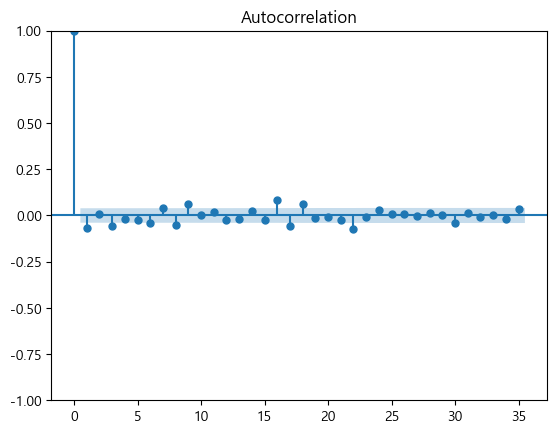

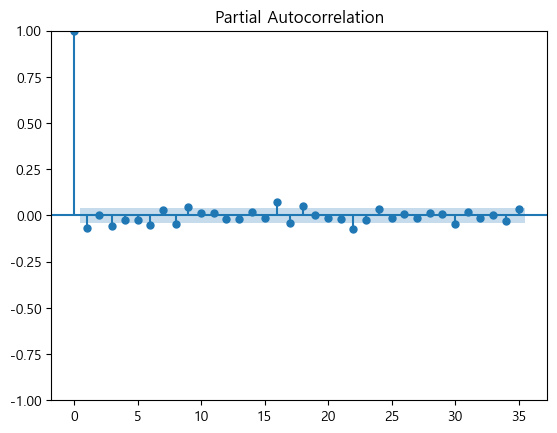

In [ ]:
### 수정종가 1차분 계산된 정상성 데이터로 ACF 및 PACF 시각화하기
# - 수정종가 1차분 데이터: dff1
plot_acf(dff1)
plot_pacf(dff1)
plt.show()

### 1차분 데이터를 이용하 ACR(q) 지표와 PACF(p) 지표는
# - 0번째를 제외한 1번째가 벗어 났기에
# - p=1, d=1, q=1로 하이퍼파라미터를 정의할 수 있음
# - 다만, d의 값의 경우 1차분만 했으며, 2차분 이후 확인 작업을 통해 
#   유의미 범위에 포함되는 비율이 높다면, d는 2차분을 사용하게 됨
#  -> 2차분 후의 p와 q의 값도 달라 질 수 있음


### (방법2)